Mount drive and import dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/My Drive/Limited Columns Shots 2021-2025.csv"
import pandas as pd
# Load the CSV
goals = pd.read_csv(file_path)
# Display the first few rows

goals.head()



,shotID,awayTeamCode,defendingTeamAverageTimeOnIce,defendingTeamAverageTimeOnIceOfDefencemen,defendingTeamAverageTimeOnIceOfForwards,event,game_id,goal,goalieIdForShot,goalieNameForShot,...,shotOnEmptyNet,shotRebound,shotRush,shotType,shotWasOnGoal,teamCode,time,timeSinceFaceoff,timeSinceLastEvent,timeUntilNextEvent
0,0,PIT,33.4,37.0,31.0,SHOT,20001,0,8477465,Tristan Jarry,...,0,0,0,WRIST,1,TBL,63,25,10,0
1,1,PIT,3.2,8.0,0.0,SHOT,20001,0,8476883,Andrei Vasilevskiy,...,0,0,0,WRIST,1,PIT,104,41,19,13
2,2,PIT,16.4,17.0,16.0,SHOT,20001,0,8477465,Tristan Jarry,...,0,0,0,WRIST,1,TBL,121,58,4,31
3,3,PIT,28.6,25.0,31.0,SHOT,20001,0,8476883,Andrei Vasilevskiy,...,0,0,0,WRIST,1,PIT,167,15,2,1
4,4,PIT,40.2,45.0,37.0,SHOT,20001,0,8477465,Tristan Jarry,...,0,0,0,WRIST,1,TBL,187,19,19,4


Get an overview of our data

In [ ]:
# Check the shape (rows, columns)
print("Shape:", goals.shape)

# List the column names
print("Columns:", goals.columns.tolist())

# Display information about data types and missing values
print(goals.info())

# Show summary statistics for numerical columns
print(goals.describe())


Shape: (437826, 37)
Columns: ['shotID', 'awayTeamCode', 'defendingTeamAverageTimeOnIce', 'defendingTeamAverageTimeOnIceOfDefencemen', 'defendingTeamAverageTimeOnIceOfForwards', 'event', 'game_id', 'goal', 'goalieIdForShot', 'goalieNameForShot', 'homeTeamCode', 'id', 'isPlayoffGame', 'lastEventCategory', 'offWing', 'playerPositionThatDidEvent', 'season', 'shooterLeftRight', 'shooterName', 'shooterPlayerId', 'shooterTimeOnIce', 'shooterTimeOnIceSinceFaceoff', 'shootingTeamAverageTimeOnIce', 'shootingTeamAverageTimeOnIceOfDefencemen', 'shootingTeamAverageTimeOnIceOfForwards', 'shotAngleAdjusted', 'shotDistance', 'shotOnEmptyNet', 'shotRebound', 'shotRush', 'shotType', 'shotWasOnGoal', 'teamCode', 'time', 'timeSinceFaceoff', 'timeSinceLastEvent', 'timeUntilNextEvent']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437826 entries, 0 to 437825
Data columns (total 37 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                              

Shape & Columns:
We have a fairly large dataset with 437,826 rows and 37 columns. The columns include a mix of identifiers (like shotID, game_id), numeric features (like defendingTeamAverageTimeOnIce, shotDistance), and categorical/text fields (like event, goalieNameForShot, shotType).

Data Types:
Numeric columns: We have several columns stored as int64 and float64 (e.g., shotID, defendingTeamAverageTimeOnIce, shotDistance).
Object columns: These are for categorical or string data (e.g., awayTeamCode, event, goalieNameForShot).

Missing Values:
Some columns have missing values. For example:
goalieNameForShot has 434,786 non-null values (so ~3,040 missing).
playerPositionThatDidEvent and shooterLeftRight also have a few missing values.
shotType shows fewer non-null counts (435,287), which might be worth investigating.

Deal with missing values:  Since the missing values are all in categorical data, I'm choosing to change the NA values to Unknown.

In [ ]:
# Fill missing values with 'Unknown' in the specified columns
goals['goalieNameForShot'] = goals['goalieNameForShot'].fillna('Unknown')
goals['shotType'] = goals['shotType'].fillna('Unknown')
goals['playerPositionThatDidEvent'] = goals['playerPositionThatDidEvent'].fillna('Unknown')
goals['shooterLeftRight'] = goals['shooterLeftRight'].fillna('Unknown')
goals['shooterName'] = goals['shooterName'].fillna('Unknown')


In [ ]:
# This prints the number of missing values in each column
missing_counts = goals.isnull().sum()
print(missing_counts)


shotID                                       0
awayTeamCode                                 0
defendingTeamAverageTimeOnIce                0
defendingTeamAverageTimeOnIceOfDefencemen    0
defendingTeamAverageTimeOnIceOfForwards      0
event                                        0
game_id                                      0
goal                                         0
goalieIdForShot                              0
goalieNameForShot                            0
homeTeamCode                                 0
id                                           0
isPlayoffGame                                0
lastEventCategory                            0
offWing                                      0
playerPositionThatDidEvent                   0
season                                       0
shooterLeftRight                             0
shooterName                                  0
shooterPlayerId                              9
shooterTimeOnIce                             0
shooterTimeOn

Since the playerID field won't be used in any calculations, I'm converting the field to a string and then filling in missing values as "unknown"

In [ ]:
# Convert shooterPlayerId to string and fill missing values with 'Unknown'
goals['shooterPlayerId'] = goals['shooterPlayerId'].astype('object').fillna('Unknown')

# Verify that there are no missing values in shooterPlayerId
print("Missing values in shooterPlayerId:", goals['shooterPlayerId'].isnull().sum())


Missing values in shooterPlayerId: 0


I remove and assign numbers to metrics such as goal type


In [ ]:
# convert categorical categories that i want to use
goals = goals.copy()

# first, last event category
# define categories to remove
categories_to_remove = ['CHL', 'EGT', 'STOP'] #challenge only has 10 instances, egt has 1 and stop has 8 so i dropped them so they dont get overfit

# define mapping for remaining categories
category_mapping = {
    'BLOCK': 0, 'DELPEN': 1, 'FAC': 2, 'GIVE': 3,
    'HIT': 4, 'MISS': 5, 'SHOT': 6, 'TAKE': 7
}

# filter out unwanted categories
goals = goals[~goals['lastEventCategory'].isin(categories_to_remove)].copy()

# convert remaining categories to numbers
goals.loc[:,'lastEventCategory'] = goals['lastEventCategory'].map(category_mapping)

goals.head()

,shotID,awayTeamCode,defendingTeamAverageTimeOnIce,defendingTeamAverageTimeOnIceOfDefencemen,defendingTeamAverageTimeOnIceOfForwards,event,game_id,goal,goalieIdForShot,goalieNameForShot,...,shotOnEmptyNet,shotRebound,shotRush,shotType,shotWasOnGoal,teamCode,time,timeSinceFaceoff,timeSinceLastEvent,timeUntilNextEvent
0,0,PIT,33.4,37.0,31.0,SHOT,20001,0,8477465,Tristan Jarry,...,0,0,0,WRIST,1,TBL,63,25,10,0
1,1,PIT,3.2,8.0,0.0,SHOT,20001,0,8476883,Andrei Vasilevskiy,...,0,0,0,WRIST,1,PIT,104,41,19,13
2,2,PIT,16.4,17.0,16.0,SHOT,20001,0,8477465,Tristan Jarry,...,0,0,0,WRIST,1,TBL,121,58,4,31
3,3,PIT,28.6,25.0,31.0,SHOT,20001,0,8476883,Andrei Vasilevskiy,...,0,0,0,WRIST,1,PIT,167,15,2,1
4,4,PIT,40.2,45.0,37.0,SHOT,20001,0,8477465,Tristan Jarry,...,0,0,0,WRIST,1,TBL,187,19,19,4


In [ ]:
# next we do player position that did event
category_mapping = {
    'L': 0, 'R': 1, 'C': 2, 'D': 3 #i did the #s like this bc shooter lr is going to be 0, 1 respectively
}

goals['playerPositionThatDidEvent'] = goals['playerPositionThatDidEvent'].map(category_mapping)

goals.head()

,shotID,awayTeamCode,defendingTeamAverageTimeOnIce,defendingTeamAverageTimeOnIceOfDefencemen,defendingTeamAverageTimeOnIceOfForwards,event,game_id,goal,goalieIdForShot,goalieNameForShot,...,shotOnEmptyNet,shotRebound,shotRush,shotType,shotWasOnGoal,teamCode,time,timeSinceFaceoff,timeSinceLastEvent,timeUntilNextEvent
0,0,PIT,33.4,37.0,31.0,SHOT,20001,0,8477465,Tristan Jarry,...,0,0,0,WRIST,1,TBL,63,25,10,0
1,1,PIT,3.2,8.0,0.0,SHOT,20001,0,8476883,Andrei Vasilevskiy,...,0,0,0,WRIST,1,PIT,104,41,19,13
2,2,PIT,16.4,17.0,16.0,SHOT,20001,0,8477465,Tristan Jarry,...,0,0,0,WRIST,1,TBL,121,58,4,31
3,3,PIT,28.6,25.0,31.0,SHOT,20001,0,8476883,Andrei Vasilevskiy,...,0,0,0,WRIST,1,PIT,167,15,2,1
4,4,PIT,40.2,45.0,37.0,SHOT,20001,0,8477465,Tristan Jarry,...,0,0,0,WRIST,1,TBL,187,19,19,4


In [ ]:
# shooterLeftRight
category_mapping = {
    'L': 0, 'R': 1
}

goals['shooterLeftRight'] = goals['shooterLeftRight'].map(category_mapping)

goals.head()

,shotID,awayTeamCode,defendingTeamAverageTimeOnIce,defendingTeamAverageTimeOnIceOfDefencemen,defendingTeamAverageTimeOnIceOfForwards,event,game_id,goal,goalieIdForShot,goalieNameForShot,...,shotOnEmptyNet,shotRebound,shotRush,shotType,shotWasOnGoal,teamCode,time,timeSinceFaceoff,timeSinceLastEvent,timeUntilNextEvent
0,0,PIT,33.4,37.0,31.0,SHOT,20001,0,8477465,Tristan Jarry,...,0,0,0,WRIST,1,TBL,63,25,10,0
1,1,PIT,3.2,8.0,0.0,SHOT,20001,0,8476883,Andrei Vasilevskiy,...,0,0,0,WRIST,1,PIT,104,41,19,13
2,2,PIT,16.4,17.0,16.0,SHOT,20001,0,8477465,Tristan Jarry,...,0,0,0,WRIST,1,TBL,121,58,4,31
3,3,PIT,28.6,25.0,31.0,SHOT,20001,0,8476883,Andrei Vasilevskiy,...,0,0,0,WRIST,1,PIT,167,15,2,1
4,4,PIT,40.2,45.0,37.0,SHOT,20001,0,8477465,Tristan Jarry,...,0,0,0,WRIST,1,TBL,187,19,19,4


In [ ]:
# shotType
category_mapping = {
    'BACK': 0, 'DEFL': 1, 'SLAP': 2, 'SNAP': 3, 'TIP': 4, 'WRAP': 5,  'WRIST' : 6
}

goals['shotType'] = goals['shotType'].map(category_mapping)

goals.head()

,shotID,awayTeamCode,defendingTeamAverageTimeOnIce,defendingTeamAverageTimeOnIceOfDefencemen,defendingTeamAverageTimeOnIceOfForwards,event,game_id,goal,goalieIdForShot,goalieNameForShot,...,shotOnEmptyNet,shotRebound,shotRush,shotType,shotWasOnGoal,teamCode,time,timeSinceFaceoff,timeSinceLastEvent,timeUntilNextEvent
0,0,PIT,33.4,37.0,31.0,SHOT,20001,0,8477465,Tristan Jarry,...,0,0,0,6.0,1,TBL,63,25,10,0
1,1,PIT,3.2,8.0,0.0,SHOT,20001,0,8476883,Andrei Vasilevskiy,...,0,0,0,6.0,1,PIT,104,41,19,13
2,2,PIT,16.4,17.0,16.0,SHOT,20001,0,8477465,Tristan Jarry,...,0,0,0,6.0,1,TBL,121,58,4,31
3,3,PIT,28.6,25.0,31.0,SHOT,20001,0,8476883,Andrei Vasilevskiy,...,0,0,0,6.0,1,PIT,167,15,2,1
4,4,PIT,40.2,45.0,37.0,SHOT,20001,0,8477465,Tristan Jarry,...,0,0,0,6.0,1,TBL,187,19,19,4


In [ ]:
exclude_cols = [
    'shotID', 'homeTeamCode', 'awayTeamCode', 'season', 'game_id',
    'id', 'goalieIdForShot', 'goalieNameForShot', 'shooterPlayerId',
    'shooterName', 'teamCode','shotWasOnGoal', 'event', 'shotOnEmptyNet', 'timeUntilNextEvent'
]


In [ ]:
# dropping variables
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop the excluded columns
df_temp = goals.drop(columns=exclude_cols, errors='ignore')


df_temp.head()


,defendingTeamAverageTimeOnIce,defendingTeamAverageTimeOnIceOfDefencemen,defendingTeamAverageTimeOnIceOfForwards,goal,isPlayoffGame,lastEventCategory,offWing,playerPositionThatDidEvent,shooterLeftRight,shooterTimeOnIce,...,shootingTeamAverageTimeOnIceOfDefencemen,shootingTeamAverageTimeOnIceOfForwards,shotAngleAdjusted,shotDistance,shotRebound,shotRush,shotType,time,timeSinceFaceoff,timeSinceLastEvent
0,33.4,37.0,31.0,0,0,4,0,2.0,1.0,34,...,4.0,34.0,48.814075,42.520583,0,0,6.0,63,25,10
1,3.2,8.0,0.0,0,0,0,1,0.0,0.0,41,...,0.0,41.0,38.367485,30.610456,0,0,6.0,104,41,19
2,16.4,17.0,16.0,0,0,4,1,3.0,1.0,25,...,25.0,17.0,18.434949,85.381497,0,0,6.0,121,58,4
3,28.6,25.0,31.0,0,0,4,0,0.0,0.0,17,...,25.0,17.0,7.853313,29.274562,0,0,6.0,167,15,2
4,40.2,45.0,37.0,0,0,2,0,0.0,0.0,35,...,45.0,51.0,8.746162,26.305893,0,0,6.0,187,19,19


In [ ]:
#look for missing data

print(df_temp[df_temp.isna().any(axis=1)])

        defendingTeamAverageTimeOnIce  \
746                              26.0   
765                              39.6   
767                              34.4   
5521                             11.0   
22251                            36.6   
...                               ...   
437488                           20.0   
437494                           39.2   
437506                           66.0   
437785                           22.2   
437797                           50.0   

        defendingTeamAverageTimeOnIceOfDefencemen  \
746                                          26.0   
765                                          38.0   
767                                          49.0   
5521                                         11.0   
22251                                        33.0   
...                                           ...   
437488                                       20.0   
437494                                       55.0   
437506                        

In [ ]:
print(df_temp.isna().sum())

defendingTeamAverageTimeOnIce                   0
defendingTeamAverageTimeOnIceOfDefencemen       0
defendingTeamAverageTimeOnIceOfForwards         0
goal                                            0
isPlayoffGame                                   0
lastEventCategory                               0
offWing                                         0
playerPositionThatDidEvent                     99
shooterLeftRight                             5489
shooterTimeOnIce                                0
shooterTimeOnIceSinceFaceoff                    0
shootingTeamAverageTimeOnIce                    0
shootingTeamAverageTimeOnIceOfDefencemen        0
shootingTeamAverageTimeOnIceOfForwards          0
shotAngleAdjusted                               0
shotDistance                                    0
shotRebound                                     0
shotRush                                        0
shotType                                     2536
time                                            0


In [ ]:
df_temp = df_temp.dropna(subset=['playerPositionThatDidEvent', 'shooterLeftRight', 'shotType']) #drop nan values

In [ ]:
print(df_temp.isna().sum())

defendingTeamAverageTimeOnIce                0
defendingTeamAverageTimeOnIceOfDefencemen    0
defendingTeamAverageTimeOnIceOfForwards      0
goal                                         0
isPlayoffGame                                0
lastEventCategory                            0
offWing                                      0
playerPositionThatDidEvent                   0
shooterLeftRight                             0
shooterTimeOnIce                             0
shooterTimeOnIceSinceFaceoff                 0
shootingTeamAverageTimeOnIce                 0
shootingTeamAverageTimeOnIceOfDefencemen     0
shootingTeamAverageTimeOnIceOfForwards       0
shotAngleAdjusted                            0
shotDistance                                 0
shotRebound                                  0
shotRush                                     0
shotType                                     0
time                                         0
timeSinceFaceoff                             0
timeSinceLast

ME LOGISTIC REGRESSION

In [ ]:
# assign X and y
feature_cols = ['defendingTeamAverageTimeOnIce','defendingTeamAverageTimeOnIceOfDefencemen','defendingTeamAverageTimeOnIceOfForwards','isPlayoffGame', 'lastEventCategory', 'offWing', 'playerPositionThatDidEvent', 'shooterLeftRight',
                'shooterTimeOnIce', 'shooterTimeOnIceSinceFaceoff', 'shootingTeamAverageTimeOnIce', 'shootingTeamAverageTimeOnIceOfDefencemen', 'shootingTeamAverageTimeOnIceOfForwards', 'shotAngleAdjusted', 'shotDistance',
                'shotRebound', 'shotRush', 'shotType', 'time', 'timeSinceFaceoff', 'timeSinceLastEvent']
X = df_temp[feature_cols]
y = df_temp.goal

In [ ]:
#use 25% of data as test
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size = 0.25, random_state = 0)

In [ ]:
#training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print("Accuracy on the training set:{:.3f}".format(logreg.score(X_train, y_train)))

Accuracy on the training set:0.930


Confusion Matrix:
 [[99773     0]
 [ 7659     0]]
Accuracy:0.929


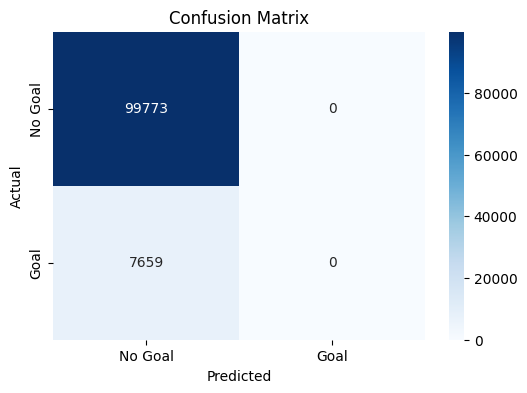

In [ ]:
#test set
y_pred = logreg.predict(X_test)
y_pred

from sklearn import metrics
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cf_matrix)

print("Accuracy:{:.3f}".format(metrics.accuracy_score(y_test, y_pred)))

# Create heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Goal', 'Goal'], yticklabels=['No Goal', 'Goal'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# precision & recall
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))

Precision: 0.000
Recall: 0.000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


thinks the that a lot more shots will make it^ (high false negatives rate)

In [ ]:
# AUC-ROC Calculation
y_prob = logreg.predict_proba(X_test)[:, 1]  # Get probabilities for positive class
auc_roc = metrics.roc_auc_score(y_test, y_prob)

print("AUC-ROC: {:.3f}".format(auc_roc))

AUC-ROC: 0.716


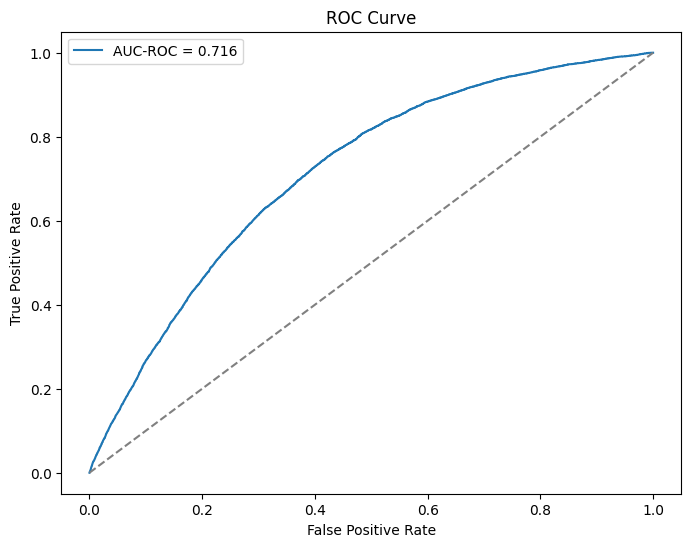

In [ ]:
from sklearn.metrics import roc_curve

# compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC-ROC = {auc_roc:.3f}')
plt.plot([0,1], [0,1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
# f1 curve
f1 = metrics.f1_score(y_test, y_pred)
print("F1-Score: {:.3f}".format(f1))

F1-Score: 0.000


cant do f1 score with no precision and no recall

In [ ]:
#which variable is most important?
importance = logreg.coef_[0] # save coefficients in "importance" object

# create a DataFrame with coefficients and feature names
importance_df = pd.DataFrame(importance, index=feature_cols, columns=["Coefficients"])

# sort by absolute value of the coefficients (most important first)
importance_df['Absolute Coefficients'] = importance_df['Coefficients'].abs()
importance_df = importance_df.sort_values(by='Absolute Coefficients', ascending=False)

# drop the helper column for display purposes
importance_df = importance_df.drop('Absolute Coefficients', axis=1)

# display the sorted DataFrame
print(importance_df)

                                           Coefficients
shotDistance                                  -0.741491
shotAngleAdjusted                             -0.273587
shootingTeamAverageTimeOnIce                   0.242884
time                                           0.093669
shootingTeamAverageTimeOnIceOfForwards        -0.075452
shooterTimeOnIce                              -0.063572
defendingTeamAverageTimeOnIceOfForwards        0.063045
shotRebound                                    0.060657
playerPositionThatDidEvent                    -0.060481
timeSinceLastEvent                            -0.045419
defendingTeamAverageTimeOnIceOfDefencemen      0.034431
defendingTeamAverageTimeOnIce                  0.033777
shotType                                       0.029982
offWing                                        0.029611
shooterTimeOnIceSinceFaceoff                  -0.029319
shooterLeftRight                               0.015711
isPlayoffGame                                 -0

<ipython-input-26-9cd5888a20a6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=importance_df.index, y=importance_df['Clipped Coefficients'], palette='viridis')


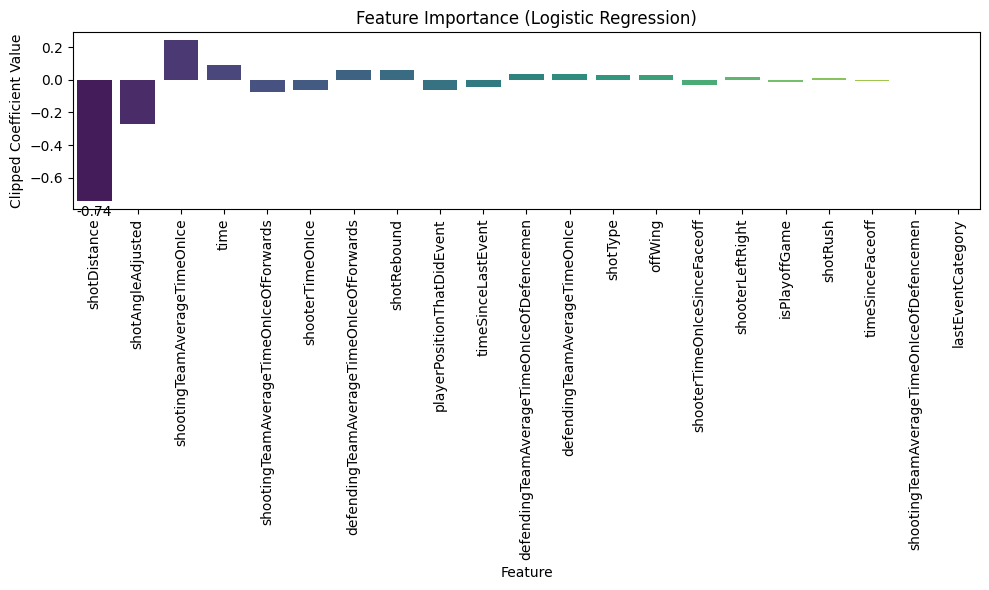

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clip the extreme coefficients to a certain range
importance_df['Clipped Coefficients'] = importance_df['Coefficients'].clip(lower=-1, upper=1)

# Create the bar plot with clipped coefficients
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=importance_df.index, y=importance_df['Clipped Coefficients'], palette='viridis')

# Add labels and title
plt.xlabel('Feature')
plt.ylabel('Clipped Coefficient Value')
plt.title('Feature Importance (Logistic Regression)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add values on top of the bars
for p in ax.containers[0]:  # Loop through the first set of bars
    ax.bar_label(ax.containers[0], fmt='%.2f', fontsize=10, color='black', padding=3)

# Show the plot
plt.tight_layout()
plt.show()

ME kNN

In [ ]:
#labelencode the target variable
from sklearn.preprocessing import LabelEncoder
labelencoder_goals = LabelEncoder()
y = labelencoder_goals.fit_transform(df_temp['goal'].values)

In [ ]:
#standardize features before knn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size = 0.25, random_state = 0)

In [ ]:
# knn with 4 nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

knn_4 = KNeighborsClassifier(n_neighbors=4)

knn_4.fit(X_train, y_train)

from sklearn import metrics
from sklearn.metrics import accuracy_score

y_pred_4 = knn_4.predict(X_test)
print("Accuracy:{:.3f}".format(metrics.accuracy_score(y_test, y_pred_4)))


Accuracy:0.927


In [ ]:
# Train a classifier for different values of k
results = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    results.append({
        'k': k,
        'accuracy': accuracy_score(y_test, y_pred)
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

    k  accuracy
0   1  0.875735
1   2  0.923570
2   3  0.914402
3   4  0.926512
4   5  0.923877
5   6  0.927833
6   7  0.926735
7   8  0.928448
8   9  0.928001
9  10  0.928550


<Axes: xlabel='k'>

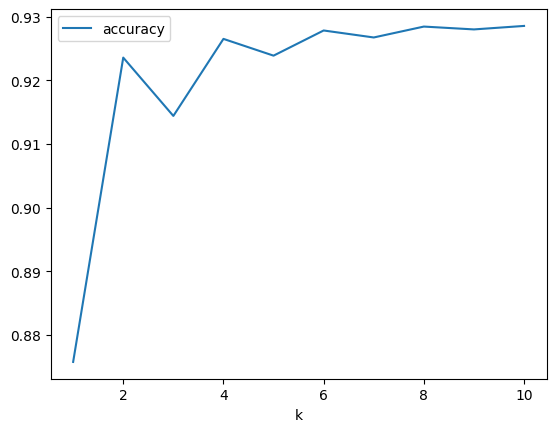

In [ ]:
results.plot(x="k", y="accuracy", kind="line")

In [ ]:
#cross validate
from sklearn.model_selection import cross_val_score

# initialize KNN model
knn = KNeighborsClassifier(n_neighbors=10)

# perform 5-fold cross-validation
cv_scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(cv_scores)

[0.92939753 0.9294208  0.92937426 0.92932772 0.92888558 0.92928118
 0.92909501 0.92972331 0.92953551 0.92948897]


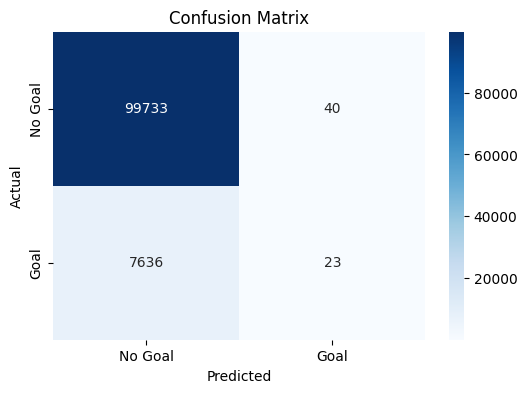

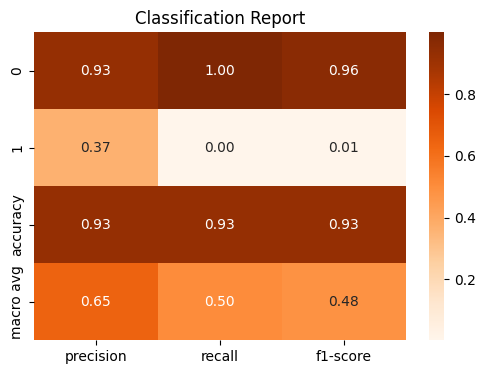

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cf_matrix = confusion_matrix(y_test, y_pred)
# plot confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Goal', 'Goal'], yticklabels=['No Goal', 'Goal'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).T  # Convert to dataframe

# plot classification report heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='Oranges', fmt=".2f")  # Exclude support column for visualization
plt.title("Classification Report")
plt.show()


most the shots in the nhl result in no goal, so it makes sense that the data is weighted so heavily. the knn was able to actually predict goals, whereas the logistic regression basically decided nothing was a goal.